In [110]:
# running this will import pandas.
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [111]:
from google.colab import auth
import gspread
from google.auth import default #autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

ModuleNotFoundError: No module named 'google'

In [112]:
# read data and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YMl1dDjvbLQ6FnSMqpLYMCSPVrSyC60FlGQ6T_crmco/edit?usp=sharing')

worksheet =gsheets.sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

pd.DataFrame.from_records(rows)

NameError: name 'gc' is not defined

In [113]:
# Create some data
hr = [187, 152 ,129 ,111 , 99 ,89 ,82,76 ,74, 71, 71, 73, 72, 71]
t = np.arange(len(hr))*20
t

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260])

In [114]:
df = pd.DataFrame(data={'Time':t, 'HeartRate':hr})
df.head()

,Time,HeartRate
0,0,187
1,20,152
2,40,129
3,60,111
4,80,99


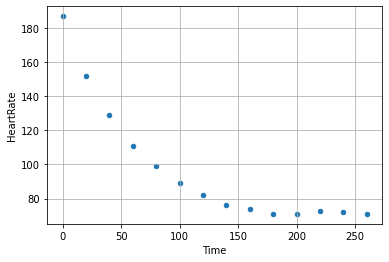

In [115]:
ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', grid = True)

In [120]:
x = df['Time'].values
y = df['HeartRate'].values

polynomial_coeff_1 = np.polyfit(x,y,1)

polynomial_coeff_2 = np.polyfit(x,y,2)

polynomial_coeff_50 = np.polyfit(x,y,25) 

C:\Users\gerkentx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [121]:
polynomial_coeff_1 = np.polyfit(df['Time'],df['HeartRate'],1)

In [122]:
df['HR_Est_1']=np.polyval(polynomial_coeff_1,x)
df['HR_Est_2']=np.polyval(polynomial_coeff_2,x)
df['HR_Est_50']=np.polyval(polynomial_coeff_50,x)
df.head()

,Time,HeartRate,HR_Est_1,HR_Est_2,HR_Est_50
0,0,187,144.971429,175.453571,187.0
1,20,152,137.580220,153.993681,152.0
2,40,129,130.189011,134.878571,129.0
3,60,111,122.797802,118.108242,111.0
4,80,99,115.406593,103.682692,99.0


<AxesSubplot:xlabel='Time', ylabel='HeartRate'>

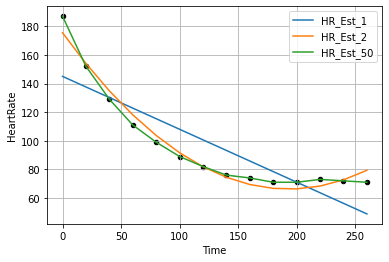

In [124]:
ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', color = 'k')
df[['Time', 'HR_Est_1','HR_Est_2','HR_Est_50']].plot(x='Time', ax=ax1, grid = True)

In [65]:
r2_1 = (np.corrcoef(df['HeartRate'],df['HR_Est_1'])[0,1])**2
r2_2 = (np.corrcoef(df['HeartRate'],df['HR_Est_2'])[0,1])**2
r2_50 = (np.corrcoef(df['HeartRate'],df['HR_Est_50'])[0,1])**2

print('The 1st order polynomial has an R2 of: %3.2f' % (r2_1))
print('The 2nd order polynomial has an R2 of: %3.2f' % (r2_2))
print('The 50th order polynomial has an R2 of: %3.2f' % (r2_25))


The 1st order polynomial has an R2 of: 0.74
The 2nd order polynomial has an R2 of: 0.98
The 50th order polynomial has an R2 of: 1.00


In [133]:
x_high_res = np.linspace(min(x),max(x),50)
print(x_high_res)
y_high_res = np.polyval(polynomial_coeff_50,x_high_res)

[  0.           5.30612245  10.6122449   15.91836735  21.2244898
  26.53061224  31.83673469  37.14285714  42.44897959  47.75510204
  53.06122449  58.36734694  63.67346939  68.97959184  74.28571429
  79.59183673  84.89795918  90.20408163  95.51020408 100.81632653
 106.12244898 111.42857143 116.73469388 122.04081633 127.34693878
 132.65306122 137.95918367 143.26530612 148.57142857 153.87755102
 159.18367347 164.48979592 169.79591837 175.10204082 180.40816327
 185.71428571 191.02040816 196.32653061 201.63265306 206.93877551
 212.24489796 217.55102041 222.85714286 228.16326531 233.46938776
 238.7755102  244.08163265 249.3877551  254.69387755 260.        ]


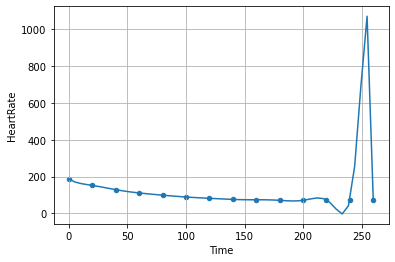

In [132]:
import matplotlib.pyplot as plt
ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', grid = True)
ax1 = plt.plot(x_high_res,y_high_res)


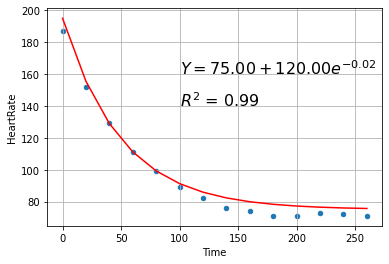

In [146]:
def func4(t, a, b, k):
    return a + b * np.exp(-k*t) 


a = 75
b = 120
k = 0.02

y_est = func4(x, a, b, k)

ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', grid = True)
ax1 = plt.plot(x,y_est, color = 'r')
ax1 = plt.text(100, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$" % (a,b,k), fontsize = 16)
ax1 = plt.text(100, 140, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)


In [87]:
r"$Y = %3.2f +  %3.2f e^{- %3.2f t}$" % (a,b,k)

'$Y = 75.00 +  120.00 e^{- 0.40 t}$'

In [142]:
popt4, pcov4  = curve_fit(func4, x, y)
popt4

<ipython-input-140-c0d3f52adf41>:2: RuntimeWarning: overflow encountered in exp
  return a + b * np.exp(-k*t)


array([6.81575240e+01, 1.19345077e+02, 1.74090799e-02])

## Reading data into a pandas dataframe

To look at some data, we have to get it into a pandas dataframe. Pandas has a lot of different functions to read data that is saved as a file. 



In [143]:
import matplotlib.pyplot as plt

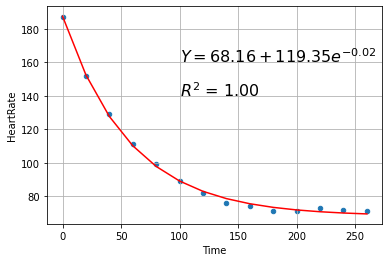

In [147]:
y_est = func4(x,popt4[0],popt4[1],popt4[2])

ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', grid = True)
ax1 = plt.plot(x,y_est, color = 'r')
ax1 = plt.text(100, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$" % (popt4[0],popt4[1],popt4[2]), fontsize = 16)
ax1 = plt.text(100, 140, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)

In [100]:
np.corrcoef(x,y_est)

array([[ 1.      , -0.866606],
       [-0.866606,  1.      ]])

In [3]:
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [129]:
np.linspace(min(x),max(x),100)

array([  0.        ,   2.62626263,   5.25252525,   7.87878788,
        10.50505051,  13.13131313,  15.75757576,  18.38383838,
        21.01010101,  23.63636364,  26.26262626,  28.88888889,
        31.51515152,  34.14141414,  36.76767677,  39.39393939,
        42.02020202,  44.64646465,  47.27272727,  49.8989899 ,
        52.52525253,  55.15151515,  57.77777778,  60.4040404 ,
        63.03030303,  65.65656566,  68.28282828,  70.90909091,
        73.53535354,  76.16161616,  78.78787879,  81.41414141,
        84.04040404,  86.66666667,  89.29292929,  91.91919192,
        94.54545455,  97.17171717,  99.7979798 , 102.42424242,
       105.05050505, 107.67676768, 110.3030303 , 112.92929293,
       115.55555556, 118.18181818, 120.80808081, 123.43434343,
       126.06060606, 128.68686869, 131.31313131, 133.93939394,
       136.56565657, 139.19191919, 141.81818182, 144.44444444,
       147.07070707, 149.6969697 , 152.32323232, 154.94949495,
       157.57575758, 160.2020202 , 162.82828283, 165.45